(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)
(168, 300)


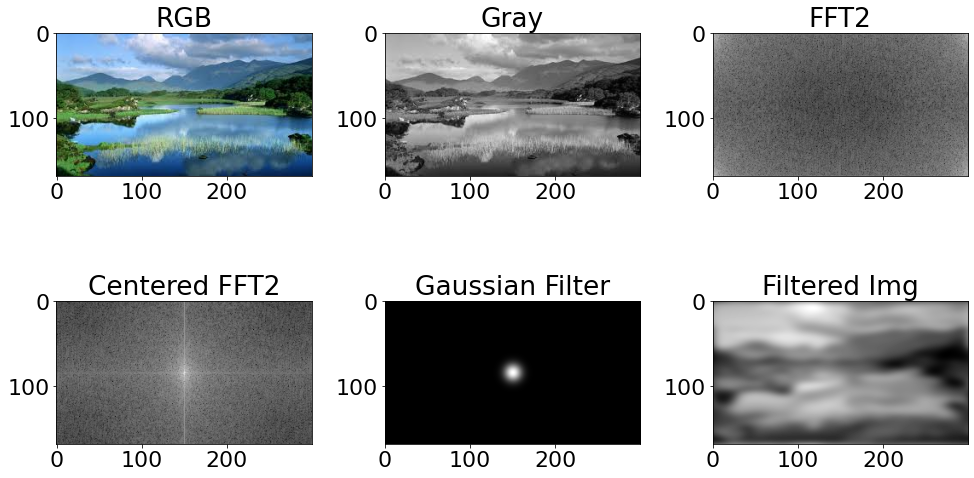

In [19]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# Build a Gaussian filter.
	ncols, nrows = gray.shape
	gaussian_filter = build_gaussian_filter(ncols, nrows)

	# Apply Gaussian filter
	ftimg_gf = centered_ftimg * gaussian_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, gaussian_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Gaussian Filter', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)
(168, 300)


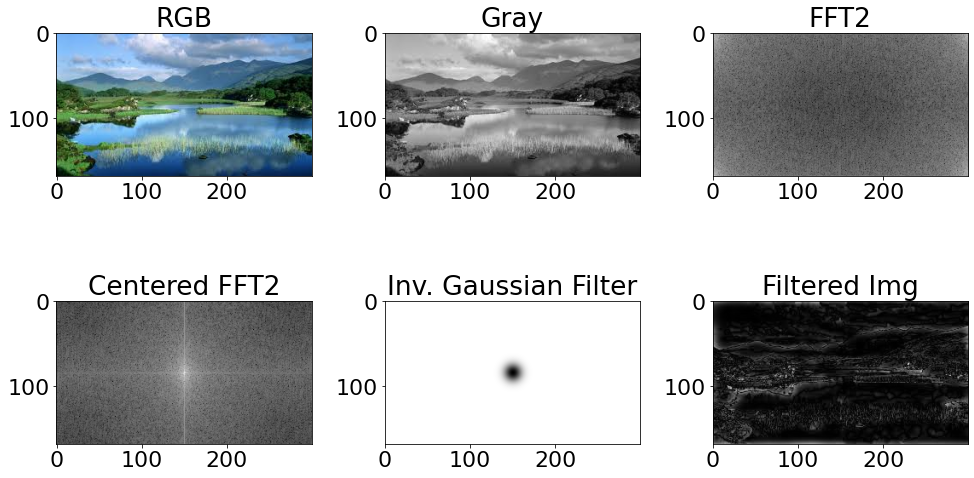

In [18]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	ncols, nrows = gray.shape
    # Build a inverse Gaussian filter.
	inv_gaussian_filter = build_inverse_gaussian_filter(ncols, nrows)

	# Apply inv Gaussian filter
	ftimg_gf = centered_ftimg * inv_gaussian_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, inv_gaussian_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Inv. Gaussian Filter', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_inverse_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	inv_gaussian_filter = 1 - np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(inv_gaussian_filter.shape)

	return inv_gaussian_filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


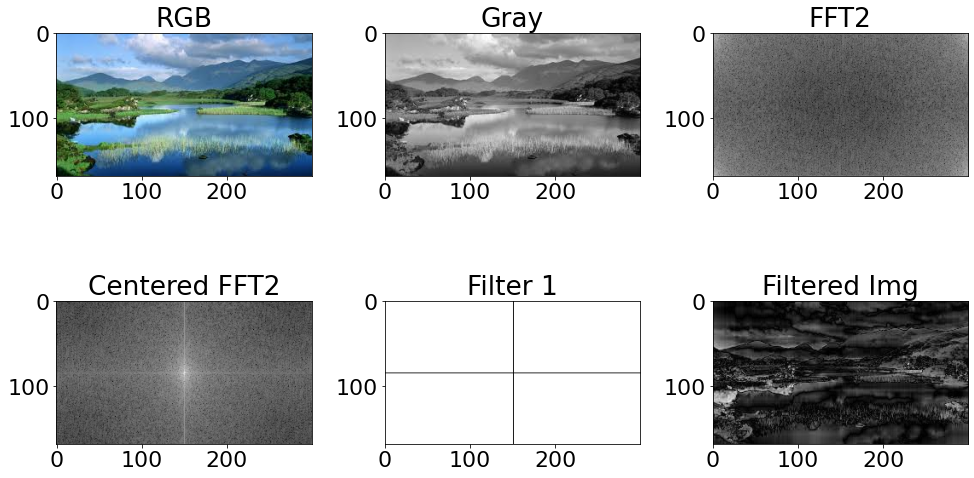

In [12]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# # Build a filter.
	ncols, nrows = gray.shape
	filter_1 = build_filter_1(ncols, nrows)
	# Apply filter 1
	ftimg_gf = centered_ftimg * filter_1
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, filter_1, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Filter 1', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_filter_1(nrows, ncols):
	filter = np.zeros((nrows, ncols))
	cx, cy = nrows//2, ncols//2
	filter[cx, :] = 1
	filter[:, cy] = 1
	return 1-filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


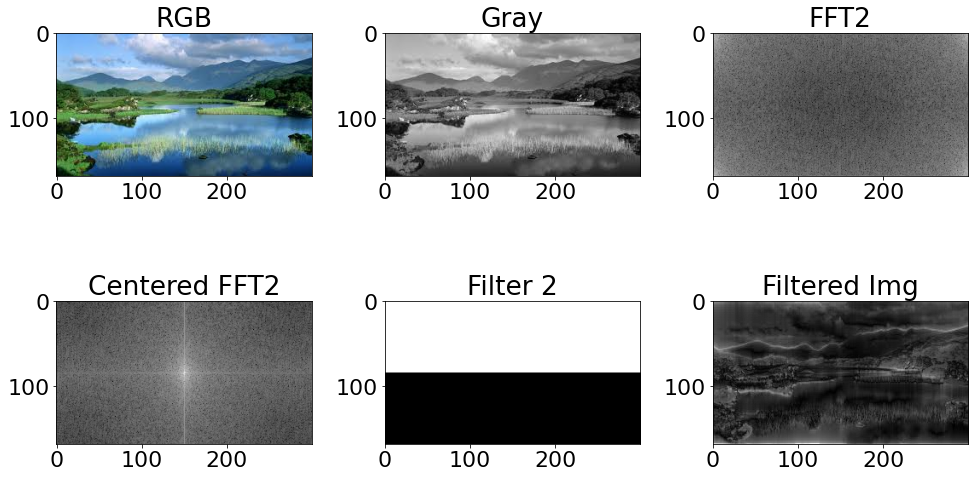

In [13]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# # Build a filter 2.
	ncols, nrows = gray.shape
	filter_2 = build_filter_2(ncols, nrows)
	# Apply filter 2
	ftimg_gf = centered_ftimg * filter_2
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, filter_2, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Filter 2', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_filter_2(nrows, ncols):
	filter = np.ones((nrows, ncols))
	cx, cy = nrows//2, ncols//2
	filter[cx:, :] = 0
	# filter[:, cy] = 1
	return filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


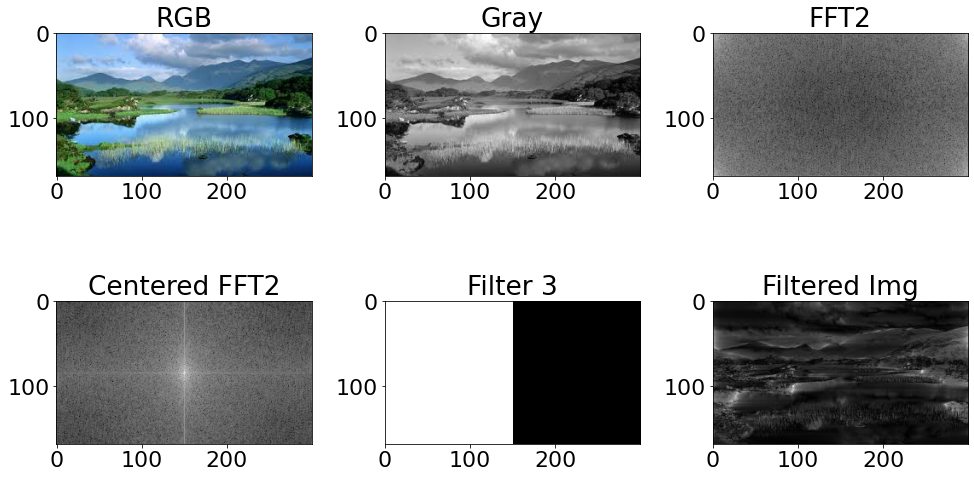

In [14]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# # Build a filter 3.
	ncols, nrows = gray.shape
	filter_3 = build_filter_3(ncols, nrows)

	# Apply filter 3
	ftimg_gf = centered_ftimg * filter_3
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, filter_3, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Filter 3', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_filter_3(nrows, ncols):
	filter = np.ones((nrows, ncols))
	cx, cy = nrows//2, ncols//2
	# filter[cx:, :] = 0
	filter[:, cy:] = 0
	return filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


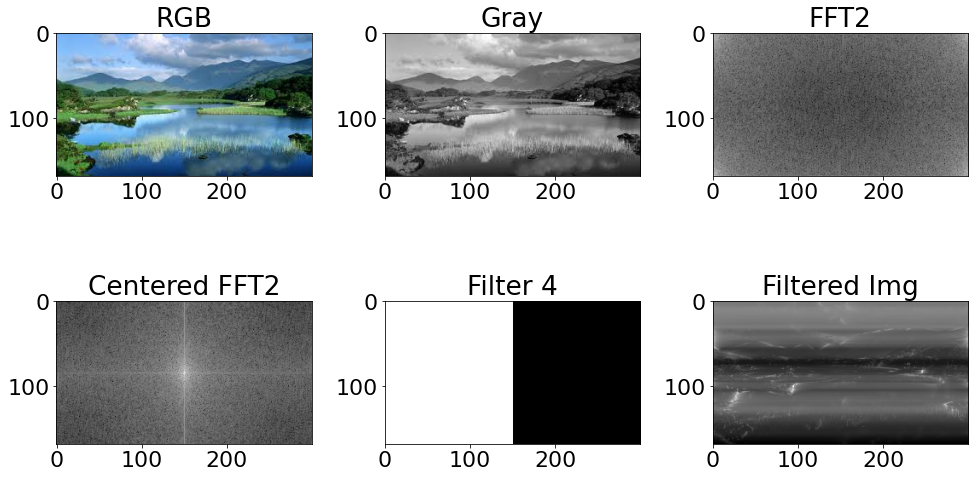

In [16]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# # Build a filter 4.
	ncols, nrows = gray.shape
	filter_4 = build_filter_4(ncols, nrows)
	# Apply filter 4
	ftimg_gf = centered_ftimg * filter_4
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, filter_4, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Filter 4', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_filter_4(nrows, ncols):
	filter = np.ones((nrows, ncols))
	cx, cy = nrows//2, ncols//2
	# filter[cx:, :] = 0
	filter[:, cy:] = -1
	return filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


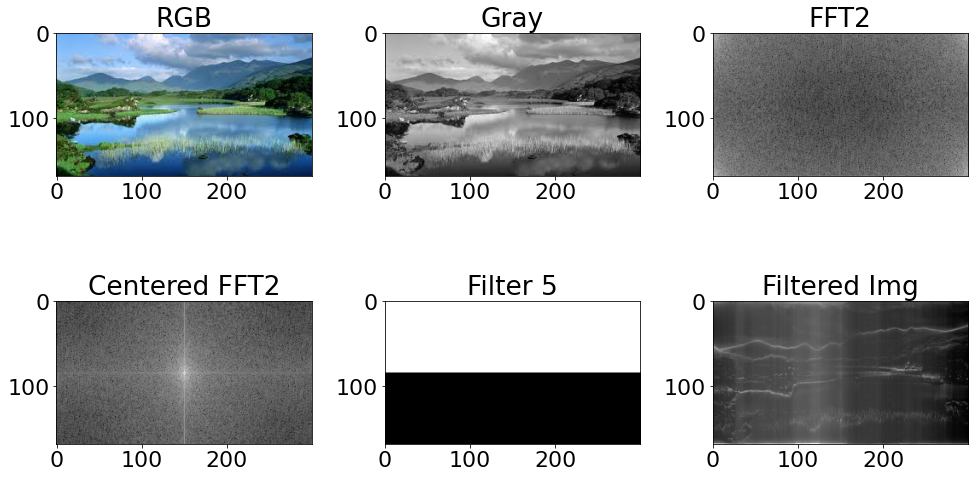

In [17]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# # Build a filter 5.
	ncols, nrows = gray.shape
	filter_5 = build_filter_5(ncols, nrows)

	# Apply filter 5
	ftimg_gf = centered_ftimg * filter_5
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, filter_5, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Filter 5', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_filter_5(nrows, ncols):
	filter = np.ones((nrows, ncols))
	cx, cy = nrows//2, ncols//2
	filter[cx:, :] = -1
	# filter[:, cy] = 1
	return filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (14, 8))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

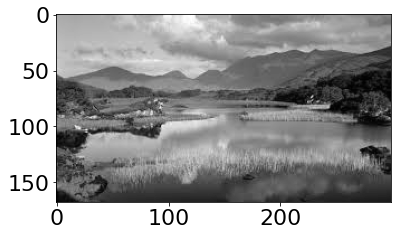

In [26]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	plt.imshow(gray, cmap='gray')


if __name__ == '__main__':
	main()